In [19]:
import gym
import numpy as np
from gym.envs.registration import register
import matplotlib.pyplot as plt

register(
    id='FrozenLakev3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={
        'map_name': '4x4',
        'is_slippery': False
    }
)
env = gym.make("FrozenLake-v1")

/opt/conda/lib/python3.8/site-packages/gym/envs/registration.py:595: UserWarning: WARN: Overriding environment FrozenLakev3
  logger.warn(f"Overriding environment {id}")


In [26]:
Q = np.zeros([env.observation_space.n,env.action_space.n])
dis = .99
num_episodes = 10000
rList = []

In [27]:
for i in range(num_episodes):
    state = env.reset() #환경 초기화
    rAll = 0
    done = False
    e = 1./ ((i//100) + 1)
    while not done:
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            actoin = np.argmax(Q[state,:])
        new_state, reward,done,_ = env.step(action)
        Q[state,action] = reward + dis * np.max(Q[new_state,:])
        rAll += reward
        state = new_state
    rList.append(rAll)

Success rate: 0.0332
Final Q-Table Values
LEFT DOWN RIGHT UP


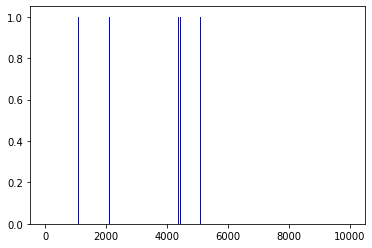

In [28]:
print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
# print(Q)
plt.bar(range(len(rList)), rList, color='blue')
plt.show()